# importeren van de Dataset
De data dat wordt gebruikt is gedownload van Kaggle, er is gekeken naar welke data potentieel veel over te vinden is.
Hier is een dataset over de prijzen van avocados gevonden dat goed kan worden gebruikt bij het maken van deze
opdrachten.

In de code hieronder importeren we  de pandas library en laden we de avocado dataset in op de variabelen 'df'.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data/avocado.csv')
data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Multiple-Linear-Regression 
In dit hoofdstuk gaan we een voorbeeld van Multiplaire Lineaire Regressie (MLR) uitwerken en evalueren. Met MLR gaan we
proberen de prijzen van de avocados te voorspellen gegeven de waardes van andere kollomen.

formule voor MLR: <br/>
\begin{equation}
\ y_i = \beta_0 x_i{_0} + \beta_1 x_i{_1}... + \beta_p x_i{_p} + {m_i}
\end{equation}


### Wat gaan we analyseren
Met behulp van MLR gaan we de prijzen van de advocado's voorspellen, de factoren die we hier voor gaan gebruiken zijn:
1. totale volume
2. Total Bags
3. Aantal per soort bag: Small, Large, XLarge
4. PLU (Price Lookup Codes) waardes: 4046, 4225, 4770

Mogelijke behulpzame factoren:
1. Jaar
2. Type: organisch of conventioneel
3. Rgio

### Uitwerking
#### Schoonmaken
Als eerst moet worden gecontroleerd hoeveel null waardes in de dataset zijn, pandas heeft hier een simpel
maar elegant truckje voor:


In [3]:
data.isnull().sum()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Zoals te zien is de data schoon, dit is maar een eerste indruk dus er kan nog altijd wat fouten inzitten. Een van deze
fouten kon al in het begin worden opgemerkt toen de .head() van de dataset werdt getoond; de kollommen zijn niet
geindexeerd en deze kollom wordt niet goed als datum object herkend.

Om dit op te lossen wordt het voglende gedaan:


In [4]:
data["Date"] = pd.to_datetime(data["Date"], yearfirst=True)
data.set_index("Date", inplace=True)
data.sort_index(inplace=True)


In [5]:
data.head(3)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


Door het opnieuw indelen van de index is de oude index, wat een gewoon geheel getal was, als een kollom toegevoegd,
deze is niet nodig en kan dus verwijderd worden


In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)


De dataset kan nu worden opgeslagen om veradnering te behouden


In [7]:
data.to_csv('data/avocado_schoon.csv', index='Date')



#### Factoren en coëfficiënten

Nu de dataset logisch gewijs klopt kunnen de factoren worden gedefinieerd, allereerst gaan we enkele kollomen weghalen
die geen continu data bevatten:

1. Type
2. Jaar
3. Region

De kolommen zeggen uiteindelijk wel iets over de prijs, maar aangezien we MLR gebruiken kunnen we deze data niet
in het model meenemen. Voor bij het gebruik van de categorische data (Type en Region) kan Multinomiale Logische Regressie
worden gebruikt, maar aangezien dat buiten de scope van het onderzoek valt, wordt deze niet gebruikt. Year is discrete
data en daar zal Poisson  Regressie voor worden gebruikt, maar valt net als de categorische data buiten de scope.

#### Waarom geen dummy variabelen
Voor het bouwen van de correlatielijn dat uit meerdere coëfficiënten bestaat, is het bijvoegen van categorische data
omgezet in dummy variabelen negatieve impact, omdat het bij MLR over continue data gaat.


In [8]:
data_continue = data.drop(["type", "region", "year"], axis=1).dropna()
data_continue.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Date,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0


Ten tweede wordt vanuit deze cotinue data de factoren opgebouwd, hiervoor gaan we sci-kit learn gebruiken:


In [9]:
Xs = data_continue.drop(["AveragePrice"], axis=1).values
y = data_continue["AveragePrice"].values
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)


Als laatst gaan we de lineaire regressie opbouwen, hiervoor gebruiken we weer sci-kit-learn.


In [10]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print(reg.intercept_) 
print(reg.coef_)


1.4205921802106742
[ 0.00020275 -0.00020286 -0.00020269 -0.0002032  -0.02537155  0.02516883
  0.0251687   0.02517015]


#### Voorspellen van prijzen
Nu de coëfficiënten zijn bepaald voor de factoren kunnen we dit model gebruiken om voorspellingen op de prijzen te maken

In [11]:
y_voorspelling = reg.predict(X_test)
voorspellingen_df = pd.DataFrame({'Werkelijk': y_test, 'Voorspelt': y_voorspelling})
voorspellingen_df.head(20)


,Werkelijk,Voorspelt
0,1.11,1.414800
1,1.68,1.421365
2,2.11,1.421134
3,2.15,1.391286
4,1.70,1.424736
5,1.91,1.420939
6,0.76,1.370642
7,1.93,1.423610
8,1.42,1.418669
9,1.20,1.419781


### Evaluatie
om te evalueren hoe goed de voorspellingen bestaan enkele rekenmethodes om de error te berekenen, iedere rekenmethode is
een manier om de error uit te rekenen en geven ieder een ander soort waarde aan. Maar de waardes moeten eerst tegen iets
worden opgewogen; het algemene gemiddelde van de dataset.


In [12]:
y_gemiddeld = np.empty(y_test.shape, y_test.dtype)
y_gemiddeld.fill(np.mean(y_test))
print(y_gemiddeld)


[1.41353151 1.41353151 1.41353151 ... 1.41353151 1.41353151 1.41353151]


Ter controle wordt de correlatie lijn van het MLR model geplot tegenover het gemiddelde van de avocado's prijzen, de
functie hieronder zorgt voor x en y waardes om de lijn te plotten.


In [13]:
def bereken_punt_y(x):
    y = 0
    for coef in reg.coef_:
        y += coef * x
    y += reg.intercept_
    return y

x = np.empty(y_test.shape, y_test.dtype)
plot_mlr = np.empty(y_test.shape, y_test.dtype)
for i in range(len(plot_mlr)):
    i = i-100
    plot_mlr[i] = bereken_punt_y(i)
    x[i] = i
    

Hieronder is de plot te zien, zoals te zien is de lijn van MLR vrij dicht in de buurt van het gemiddelde, bij grote
waardes van de coëfficiënten zullen er pas verschillen komen.


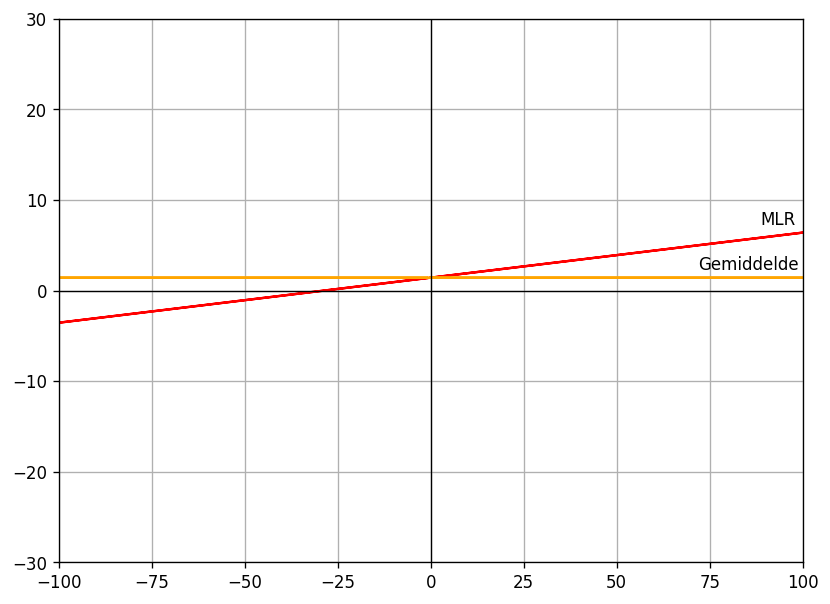

In [14]:
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
plt.ylim(-30, 30)
plt.xlim(-100, 100)
plt.plot(x, plot_mlr, linewidth=1.4, c='red')
plt.plot(x, y_gemiddeld, linewidth=1.4, c='orange')
plt.text(88.7,7.3, 'MLR', rotation=0)
plt.text(72,2.3, 'Gemiddelde', rotation=0)
plt.axhline(c='black', linewidth=0.8)
plt.axvline(c='black', linewidth=0.8)
plt.grid()
plt.show()


#### R kwadraat
Berekenen van de r2 score voor y_pred en het gemiddelde (0 hopelijk)

In [15]:
print('r^2 score van y_voorspelling:', r2_score(y_test, y_voorspelling))
print('r^2 score van y_gemiddled:', r2_score(y_test, y_gemiddeld))


r^2 score van y_voorspelling: 0.059251413602988134
r^2 score van y_gemiddled: 0.0


#### Mean Absolute Error (MAE)
De MAE geeft aan hoeveel de absolute afwijking per voorspelling is, zo te zien is het MLR model gemiddeld 31 cent
afwijkend van de daadwerkelijke prijs. Vergeleken met de 32 cent van het gemiddelde, een kleine verbeterin, maar
nogsteeds slecht

Vergeleken met voorspelling:

In [16]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_voorspelling))


Mean Absolute Error: 0.3135968009826497


Vergeleken met het gemiddelde van y_test


In [17]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_gemiddeld)) 


Mean Absolute Error: 0.32494888647025705


#### Mean Squared Error (MSE) 
Met MSE geef je de kwadratische error aan, hiermee kan je testen of er veel outliers in data zitten, zoals te zien is
dat de error relatief in de buurt is vergeleken met de MAE zijn er niet veel outliers in de dataset.


In [18]:
print('Mean Squared Error:', mean_squared_error(y_test, y_voorspelling))

Mean Squared Error: 0.15359315535007795



Vergeleken met het gemiddelde van y_test

In [19]:
print('Mean Absolute Error:', mean_squared_error(y_test, y_gemiddeld)) 


Mean Absolute Error: 0.1632669531169075


#### Root Mean Squared Error (RMSE)
Gezien de MSE een klein getal ( >1 ) is de RMSE geen goede meetmethode voor de uitkomsten bij deze dataset.


In [20]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_voorspelling)))


Root Mean Squared Error: 0.39190962650855865


Vergeleken met het gemiddelde van y_test


In [21]:
print('Mean Absolute Error:', np.sqrt(mean_squared_error(y_test, y_gemiddeld)))


Mean Absolute Error: 0.40406305586740726


### Conclusie
MLR werkt maar de eigenschappen van de dataset hebben weinig correlatie met elkaar, waardoor bij het voorspellen van de
gemiddelde prijs het iets beter gaat dan het gemiddelde gebruiken, maar het zo klein het verschil is dat het bijna
nutteloos is. Dit MLR model is een bewijs dat de data van de avocado's geen correlatie met de prijs heeft.


## K-Nearest Neighbour
In dit hoofdstuk gaan we een voorbeeld van K-nearest Neighbour (KNN) uitwerken en evalueren. Door middel van deze
analyse techniek wordt geprobeerd te voorspellen wat voor type de avocado is.

Formule voor KNN:
\begin{equation}
\\ y_i = magie
\end{equation}

### Wat gaan we analyseren
Met behulp van K-Nearest Neighbour gaan we proberen te voorspellen wat voor type de advocado's gegeven de factoren.

Sci-Kit Learn biedt de mogelijkheid om een plot te maken voor KNN met een uniforme verdeling en een verdeling op
afstand. Deze plots worden in het kopje Uitwerking toegelicht en weergegeven.

### Uitwerking
Voor dat we beginnen gaan we een aantal libraries van sklearn importeren


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


Als eerst gaan we het data object van MLR gebruiken, aangezien deze al opgeschoont is, om de data te pakken dat nodig is
voor KNN. Voor nu wordt het aantal neighbours op 10 gezet. Dit is een waarde dat willekeurig is gekozen.


In [23]:
data = pd.read_csv('data/avocado_schoon.csv', index_col="Date")
data.replace(to_replace=['organic', 'conventional'], value=[0, 1], inplace=True)
data.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,0,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,0,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,0,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,1,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,0,2015,Boise


Ten tweede gaan we de constanten vaststellen voor bij het classificeren


In [24]:
n_neighbors = 5
data_minder = data.loc[data['4046'] < 500000]
X_knn = data_minder[['AveragePrice', '4046']].values
y_knn = data_minder[['type']].values
h_knn = 4  # stap grote in de meshgrid

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

y_serialized = []
for element in y_knn:
    y_serialized.append(element[0])
    
print(data_minder.head())


            AveragePrice  Total Volume     4046      4225     4770  \
Date                                                                 
2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
2015-01-04          1.68       2896.72   161.68    206.96     0.00   
2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

            Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
Date                                                                      
2015-01-04    13598.46    13061.10      537.36          0.0     0  2015   
2015-01-04      905.55      905.55        0.00          0.0     0  2015   
2015-01-04     2528.08     2528.08        0.00          0.0     0  2015   
2015-01-04    14925.18    11264.80     3660.38          0.0     1  2015   
2015-01-04      374.35      186.67      187.68          0.0

De functie hieronder berekent de KNN predicter uit en plot de gegeven data in een grafiek te verduidelijking. De functie heeft verschillende onderdelen;

1. Aanmaken van de classifier class.
2. Berekenen van de maximum en minimum van beide assen zodat de grafiek goed visueel getoond kan worden.
3. Rangschikken van de punten.
4. Het plotten van de resultaat en een kleurmap in de grafiek plaatsen.

In [25]:
def KNearestNeighbour(weight):
    # instantie van de classifier class aanmaken
    clf = KNeighborsClassifier(n_neighbors, weights=weight)
    clf.fit(X_knn, y_knn)

    # minimum en maximum per as bepalen
    x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
    y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1

    # volgorde van x en y goedzetten
    x_a = np.arange(x_min, x_max, h_knn)
    y_a = np.arange(y_min, y_max, h_knn)

    xx, yy = np.meshgrid(x_a, y_a)
    print("Done meshing..")

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print("Done predicting..")

    # Zet het resultaat in een plot
    Z = Z.reshape(xx.shape)
    plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot de training data
    plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_serialized, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = 10, weights = 'Distance')")
    plt.show()

Sci-kit Learn biedt twee type berkeningmethodes voor KNN: uniforme verdeling of verdeling op afstand. Beide types worden geplot.

De KNN model gebaseerd op afstand wordt bepaalde door van het k aantal neighbours de korste afstand te pakken en daarmee voorspelling te maken. Het model op afstand is handiger voor grafieken waarbij er ruimte tussen de punten is en ze daarmee goed te onderscheiden zijn.

Done meshing..


/Users/tim/Developer/Pycharm/Datascience-Opdrachten/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Done predicting..


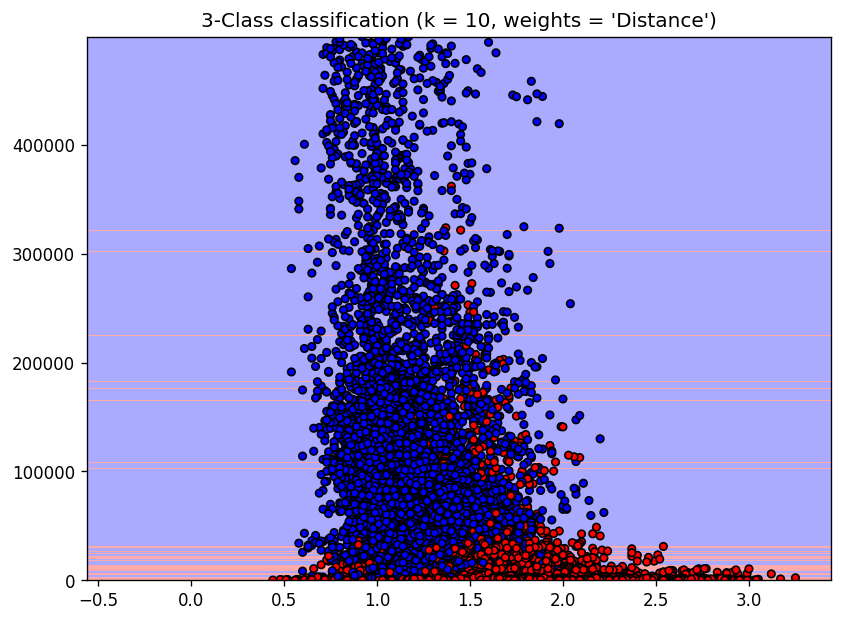

In [26]:
KNearestNeighbour('distance')


Bij de uniforme berekening worden de punten in een distributie geplaatsts en wordt naar de standaarddeviatie gekeken op welke type het moet worden verdeeld. De uniforme verdeling is handiger bij dichtbevolkte voorspelling zoals in deze grafieken te zien is.


/Users/tim/Developer/Pycharm/Datascience-Opdrachten/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Done meshing..
Done predicting..


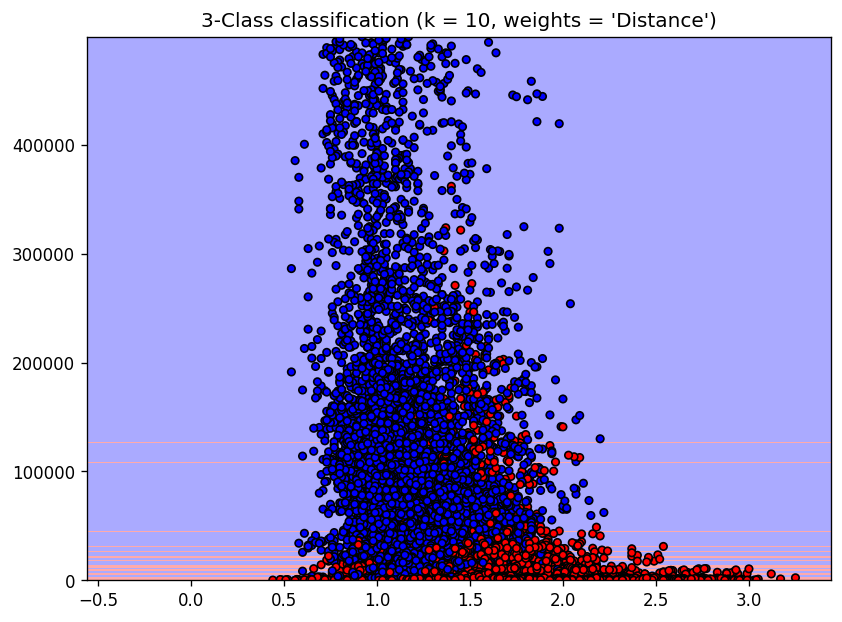

In [27]:
KNearestNeighbour('uniform')
